In [ ]:
!wget http://sbert.net/datasets/unsplash-25k-photos.zip -q

In [ ]:
!unzip unsplash-25k-photos.zip -d data -qq

#Imports

In [ ]:
!pip install -U sentence-transformers -q
!pip install gradio -q


In [5]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
import glob



In [6]:
# creating list of images
images = list(glob.glob('data/*.jpg'))
images= images[:1000] #its takes time to run full dataset so taking just first 1000 

In [7]:
len(images) #number of jpg file inside list

1000

In [8]:
import random 
random.randint(0, len(images)-1)

580

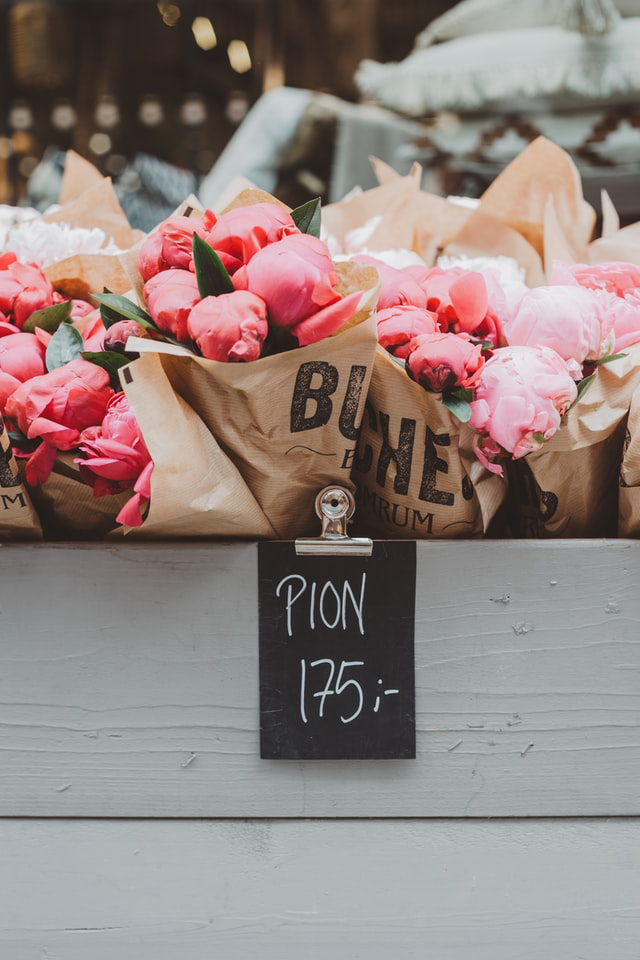

In [9]:
#showing image randomly
Image.open(images[random.randint(0, len(images)-1)])

In [10]:
#lets load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')

In [11]:
img_emb = model.encode([Image.open(filepath) for filepath in images],
                       batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [12]:
#query = 'two dogs'

#query_emb = model.encode([query], show_progress_bar=False)

In [13]:
#util.semantic_search(query_emb, img_emb, top_k = 3)[0] 
#top 3

In [14]:
#Image.open(images[568])

In [15]:
# displaying image
def display_image(filepath, title = ''):
    fig = plt.figure()
    img = mpimg.imread(filepath)
    imgplot = plt.imshow(img)

    plt.title(title)
    plt.axis('off')
    plt.show()
    print()

In [16]:
# looking for image by provideing text
def search_by_text(query, k):
    print(f"Query = {query}\n") #\n:new line
    query_emb = model.encode([query], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0] #top k

    for res in results:
        file_name = images[res['corpus_id']]
        display_image(file_name, f"Similarity : {res['score']}") #displaying similar images

Query = two dogs



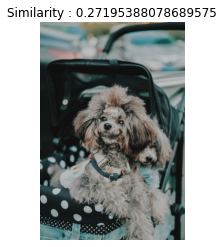

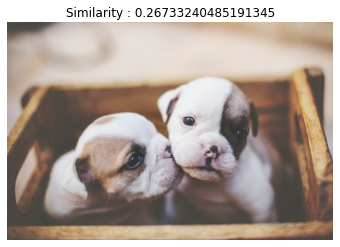

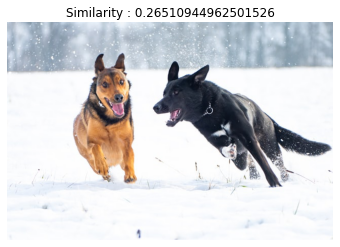

In [17]:
search_by_text('two dogs', 3)

In [18]:
# looking into image by providinng image 
def search_by_image(filepath, k):
    display_image(filepath, 'Original image')
    query_image = Image.open(filepath)
    query_emb = model.encode([query_image], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0] #top k

    for res in results:
        file_name = images[res['corpus_id']]
        display_image(file_name, f"Similarity : {res['score']}") #displaying similar images


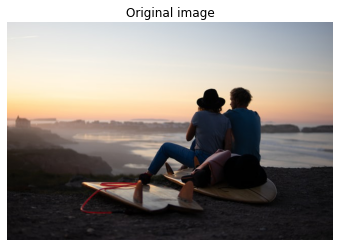

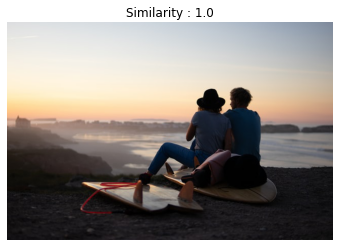

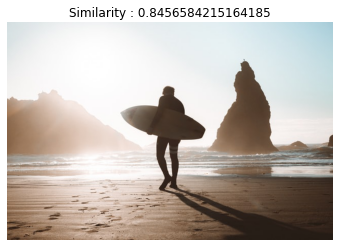

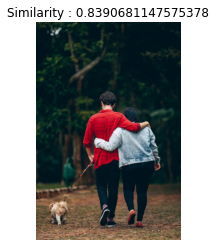

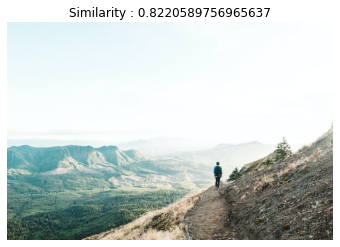

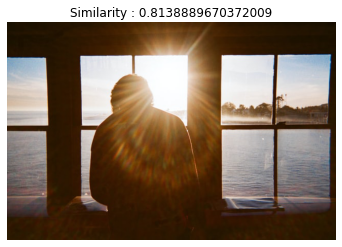

In [19]:
search_by_image('data/df-BFy8gah0.jpg', 5)

In [21]:
!wget -O test.jpg https://i.ibb.co/pfGRsgM/57038508-171805033811465-341578166544201906-n.jpg

--2023-02-19 00:24:34--  https://i.ibb.co/pfGRsgM/57038508-171805033811465-341578166544201906-n.jpg
Resolving i.ibb.co (i.ibb.co)... 104.243.38.177, 104.243.38.202
Connecting to i.ibb.co (i.ibb.co)|104.243.38.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159128 (155K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 155.40K  --.-KB/s    in 0.06s   

2023-02-19 00:24:35 (2.47 MB/s) - ‘test.jpg’ saved [159128/159128]



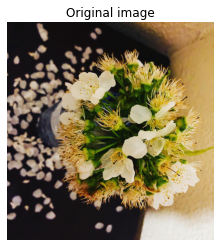

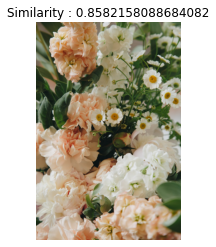

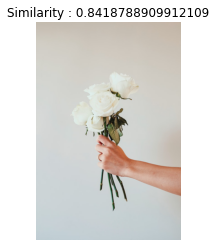

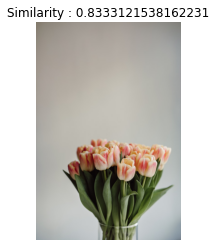

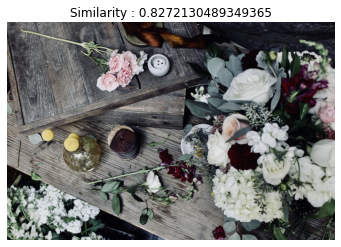

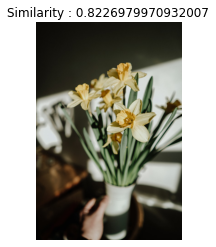

In [22]:
search_by_image('test.jpg', 5)

In [30]:
import gradio as gr

def gradio_search(text, k):
    query_emb = model.encode([text], show_progress_bar=False)
    results = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    gallery = [(images[res['corpus_id']], res["score"]) for res in results]
    return gallery

gr.Interface(fn=gradio_search, 
             inputs=['text',
                     gr.Slider(1, 10, value=3, step=1)],
             examples = [
                 ["Two dogs", None],
                 ["A person taking a picture", None],
                 ],
             outputs=[gr.Gallery()]).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
